In [1]:
#Import the packages
import geopandas as gpd
import matplotlib.pyplot as plt


## Data
In this lesson we will use simplified point data about wild pigs (Sus scrofa) sightings in California, USA from the Global Biodiversity Information Facility.

We can read in a shapefile with geopandas by using the gpd.read_file() function.

In [2]:
pigs = gpd.read_file('./eds220-week4/data/gbif_sus_scroga_california/gbif_sus_scroga_california.shp')

In [3]:
pigs.head()

,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
0,899953814,Sus scrofa,California,NaN,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks,POINT (-121.53812 37.08846)
1,899951348,Sus scrofa,California,NaN,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman,POINT (-120.54942 35.47354)
2,896560733,Sus scrofa,California,NaN,20.0,12.0,1937.0,MVZ,Hild,MVZ:Hild:195,"Museum of Vertebrate Zoology, University of Ca...",POINT (-122.27063 37.87610)
3,896559958,Sus scrofa,California,NaN,1.0,4.0,1969.0,MVZ,Hild,MVZ:Hild:1213,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.82297 38.44543)
4,896559722,Sus scrofa,California,NaN,1.0,1.0,1961.0,MVZ,Hild,MVZ:Hild:1004,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.74559 38.54882)


## GeoSeries and GeoDataFrame
The core data structure in GeoPandas is the geopandas.GeoDataFrame. We can think of it as a pandas.DataFrame with a dedicated geometry column that can perform spatial operations.

The geometry column in a gpd.GeoDataFrame holds the geometry (point, polygon, etc) of each spatial feature. This column is of type GeoPandas.GeoSeries. The other non-geometry columns in the dataframe are the standard pd.series type



In [4]:
# type of the pigs dataframe 
print(type(pigs))

# type of the geometry column
print(type(pigs.geometry))

# type of the gbifID column
print(type(pigs.gbifID))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geoseries.GeoSeries'>
<class 'pandas.core.series.Series'>


In [5]:
pigs.dtypes

gbifID           int64
species         object
state           object
individual     float64
day            float64
month          float64
year           float64
inst            object
collection      object
catalogNum      object
identified      object
geometry      geometry
dtype: object

In [6]:
pigs.geom_type

0       Point
1       Point
2       Point
3       Point
4       Point
        ...  
1041    Point
1042    Point
1043    Point
1044    Point
1045    Point
Length: 1046, dtype: object

## Geometric Information

Two other important attributes of a gpd.GeoDataFrame are its coordinate reference system (CRS) and its extent.

We can think of the coordinate reference system (CRS) as the instructions to locate each feature in our dataframe on the surface of the Earth. We access the CRS of a gpd.GeoDataFrame using the crs attribute

In [7]:
# access the CRS of the GeoDataFrame
pigs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

The extent of the geo-dataframe is the bounding box covering all the features in our geo-dataframe. This is formed by finding the points that are furthest west, east, south and north.

We access the extent of a gpd.GeoDataFrame using the total_bounds attribute:

In [8]:
pigs.total_bounds

array([-124.29448 ,   32.593433, -115.4356  ,   40.934296])

## Data Wrangling
GeoPandas is conveniently built on top of pandas, so we may use everything we have learned about data selection, wrangling, and modification for a pd.DataFrame.

Example

Suppose we only want to use recent data for wild pig observations. A quick check shows that this dataframe has data since 1818:

In [9]:
# use sort_index() method to order the index
pigs.year.value_counts().sort_index()

1818.0     31
1910.0      1
1925.0      1
1927.0      4
1929.0      3
         ... 
2019.0    101
2020.0    159
2021.0    164
2022.0    185
2023.0     98
Name: year, Length: 61, dtype: int64

In [10]:
# selet data from 2020 onwards
pigs_recent = pigs[pigs.year>=2020]

# print length of original dataframe
print(len(pigs))

# check length of new dataframe
len(pigs_recent)

1046


606

## Plotting
### plot()
Similarly to a pd.DataFrame, a gpd.GeoDataFrame has a plot() method that we can call directly to create a quick view of our data. The geospatial information of the gpd.GeoDataFrame will be used to create the axes of the plot.

Example

This is a quick look at our recent pigs data:

<AxesSubplot:>

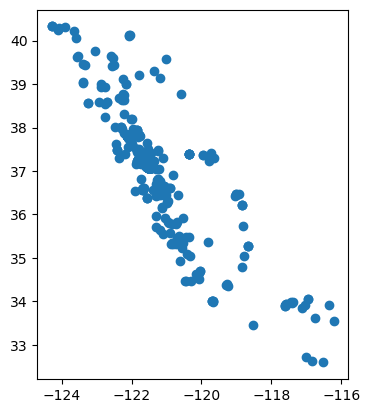

In [11]:
pigs_recent.plot()

### Matplotlib `fig` and `ax`
Going forward, we will often want to make more complex visualizations where we add different layers to a graph and customize it. To do this we will use the matplotlib Python library for creating visualizations. We can interact with matplotlib via its pyplot interface, which we imported at the top of the notebook.

Matplotlib graphs the data in a figure which can have one or more axes. The axis is only the area specified by the x-y axis and what is plotted in it. To create a new blank figure:

Initialize a new figure and axes by calling pyplot’s subplots() function, and
show the graph using plt.show():
```
# create a blank figure (fig) with an empty axis (ax)
fig, ax = plt.subplots()

# display figure
plt.show()
```

### Adding a layer
When using matplotlib, it can be useful to think of creating a plot as adding layers to an axis. The general syntax to plot a datafram df onto an axis is:
```
# create new figure and axis
fig, ax = plt.subplots()

# plot df on the ax axis
df.plot(ax=ax, 
        ...)   # other arguments for plot function

# display figure
plt.show()
```

<function matplotlib.pyplot.show(close=None, block=None)>

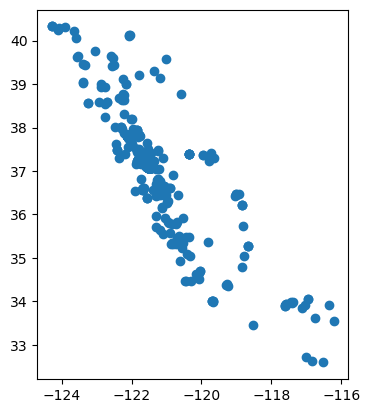

In [19]:
# create new figure and axis
figure1, axis = plt.subplots()

# add pigs point plot to our figure's axis
pigs_recent.plot(ax=axis)

# display figure
plt.show

### Customization
Matplotlib allows for a lot of customization. Some of it can be done directly in the plot() method for the dataframe (like we’ve done when ploting data using pandas), while other is done by updating attributes of the axis ax. 

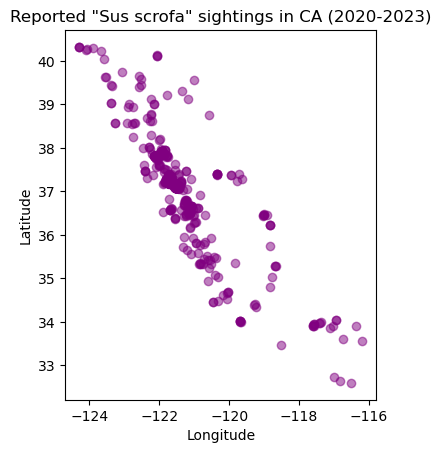

In [34]:
# initialize empty figure
figure2, axis = plt.subplots()

# add data to axis
# notice customization happens as arguments in plot()
pigs_recent.plot(ax=axis,
                 alpha=0.5,
                 color='purple'
                 )


# update axis 
# customization separate from the data plotting
#the 'axis.' part calls which axis you want to customize
axis.set_title('Reported "Sus scrofa" sightings in CA (2020-2023)')
axis.set_xlabel('Longitude')
axis.set_ylabel('Latitude')

# display figure
plt.show()

## Exercise
Open the CA-boundary shapefile and stpre it as ca_boundary
- see how many features it has
- add it to the pig sightings graph so that the california boundary appears behind the points

In [26]:
ca_boundary = gpd.read_file('./eds220-week4/data/ca-boundary/ca-boundary.shp')

In [27]:
ca_boundary.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,4,9,06,01779778,06,CA,California,00,G4000,A,403501101370,20466718403,+37.1551773,-119.5434183,"MULTIPOLYGON (((-119.63473 33.26545, -119.6363..."


In [33]:
ca_boundary.geom_type

0    MultiPolygon
dtype: object

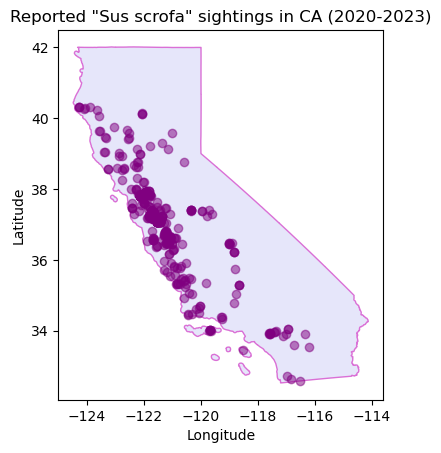

In [38]:
# initialize empty figure
figure2, axis = plt.subplots()

# add data to axis
# notice customization happens as arguments in plot()
ca_boundary.plot(ax=axis,
                color = "lavender",
                edgecolor = 'orchid')
pigs_recent.plot(ax=axis,
                 alpha=0.5,
                 color='purple'
                 )


# update axis 
# customization separate from the data plotting
#the 'axis.' part calls which axis you want to customize
axis.set_title('Reported "Sus scrofa" sightings in CA (2020-2023)')
axis.set_xlabel('Longitude')
axis.set_ylabel('Latitude')

# display figure
plt.show()